In [35]:
import pandas as pd
import numpy as np
import warnings
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DS1_C5_S3_Mtcars_Data_Practice.csv')
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,210,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,210,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,205,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,330,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,223,3.92,3.440,18.30,1,0,4,4


In [5]:
# task 1.1 random sampling without replacement

t3a = df.sample(20, replace = False, random_state = 1, ignore_index = True)
t3a

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
1,Hornet 4 Drive,21.4,6,258.0,210,3.08,3.215,19.44,1,0,3,1
2,AMC Javelin,15.2,8,304.0,180,3.15,3.435,17.30,0,0,3,2
3,Honda Civic,30.4,4,75.7,280,4.93,1.615,18.52,1,1,4,2
4,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
5,Fiat 128,32.4,4,78.7,340,4.08,2.200,19.47,1,1,4,1
6,Dodge Challenger,15.5,8,318.0,250,2.76,3.520,16.87,0,0,3,2
7,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
8,Toyota Corolla,33.9,4,71.1,180,4.22,1.835,19.90,1,1,4,1
9,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4


In [6]:
# t1.2 with replacement

t3b = df.sample(20, replace = True, random_state = 1, ignore_index = True)
t3b

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Valiant,18.1,6,225.0,205,2.76,3.460,20.22,1,0,3,1
1,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
2,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
3,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
4,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
5,Merc 280,19.2,6,167.6,223,3.92,3.440,18.30,1,0,4,4
6,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
7,Valiant,18.1,6,225.0,205,2.76,3.460,20.22,1,0,3,1
8,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
9,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4


In [9]:
# t1.3 systematic sampling with step 5

t3bindex = np.arange(0, len(df), 5)
df.iloc[t3bindex]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
5,Valiant,18.1,6,225.0,205,2.76,3.460,20.22,1,0,3,1
10,Merc 280C,17.8,6,167.6,223,3.92,3.440,18.90,1,0,4,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
25,Fiat X1-9,27.3,4,79.0,290,4.08,1.935,18.90,1,1,4,1
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8


In [16]:
# t1.4 stratified sampling

t34 = df.groupby('vs')
vsgrp = df['vs'].unique()
ndf = pd.DataFrame()

for i in vsgrp:
    data = t34.get_group(i)
    sample = data.sample(20, replace = True, random_state = 1)
    ndf = ndf.append(sample, ignore_index = True)
    
ndf

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
1,AMC Javelin,15.2,8,304.0,180,3.15,3.435,17.30,0,0,3,2
2,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
3,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
4,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
5,AMC Javelin,15.2,8,304.0,180,3.15,3.435,17.30,0,0,3,2
6,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
7,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
8,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
9,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6


In [17]:
# task 1.5 clustered sampling

t35 = df.groupby('vs')
vsgrp2 = [0, 1]
ndf2 = pd.DataFrame()

for i in vsgrp2:
    data2 = t35.get_group(i)
    sample2 = data2.sample(20, replace = True, random_state = 1)
    ndf2 = ndf2.append(sample2, ignore_index = True)
    
ndf2

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
1,AMC Javelin,15.2,8,304.0,180,3.15,3.435,17.30,0,0,3,2
2,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
3,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
4,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
5,AMC Javelin,15.2,8,304.0,180,3.15,3.435,17.30,0,0,3,2
6,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
7,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
8,Mazda RX4,21.0,6,160.0,210,3.90,2.620,16.46,0,1,4,4
9,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6


In [24]:
# task 2

pop = df['hp']
sam10 = pop.sample(10, replace = True, random_state = 1, ignore_index = True)
sam20 = pop.sample(20, replace = True, random_state = 1, ignore_index = True)
sam30 = pop.sample(30, replace = True, random_state = 1, ignore_index = True)

In [80]:
# t2.1 mean, median and standard deviation of sample sizes 10, 20 and 30

sam10mean = st.mean(sam10)
sam10med = st.median(sam10)
sam10std = st.stdev(sam10)

sam20mean = st.mean(sam20)
sam20med = st.median(sam20)
sam20std = st.stdev(sam20)

sam30mean = st.mean(sam30)
sam30med = st.median(sam30)
sam30std = st.stdev(sam30)

print(f"""
Mean, Median and standard deviation of sample size 10 are {sam10mean}, {sam10med} and {sam10std} respectively
_____________________________________________________________________________________________________________
Mean, Median and standard deviation of sample size 20 are {sam20mean}, {sam20med} and {sam20std} respectively
_____________________________________________________________________________________________________________
Mean, Median and standard deviation of sample size 30 are {sam30mean}, {sam30med} and {sam30std} respectively""")


Mean, Median and standard deviation of sample size 10 are 180.2, 192.5 and 44.08275046873651 respectively
_____________________________________________________________________________________________________________
Mean, Median and standard deviation of sample size 20 are 205.4, 207.5 and 61.024930194660264 respectively
_____________________________________________________________________________________________________________
Mean, Median and standard deviation of sample size 30 are 211.2, 207.5 and 62.313667067893505 respectively


In [81]:
# t2.2 mean, median and standard deviation of entire population data

popmean = st.mean(pop)
popmed = st.median(pop)
popstd = st.stdev(pop)

print(f"""
Mean, Median and standard deviation of entire population data are {popmean}, {popmed} and {popstd} respectively""")


Mean, Median and standard deviation of entire population data are 211.3125, 210.0 and 68.5134493507332 respectively


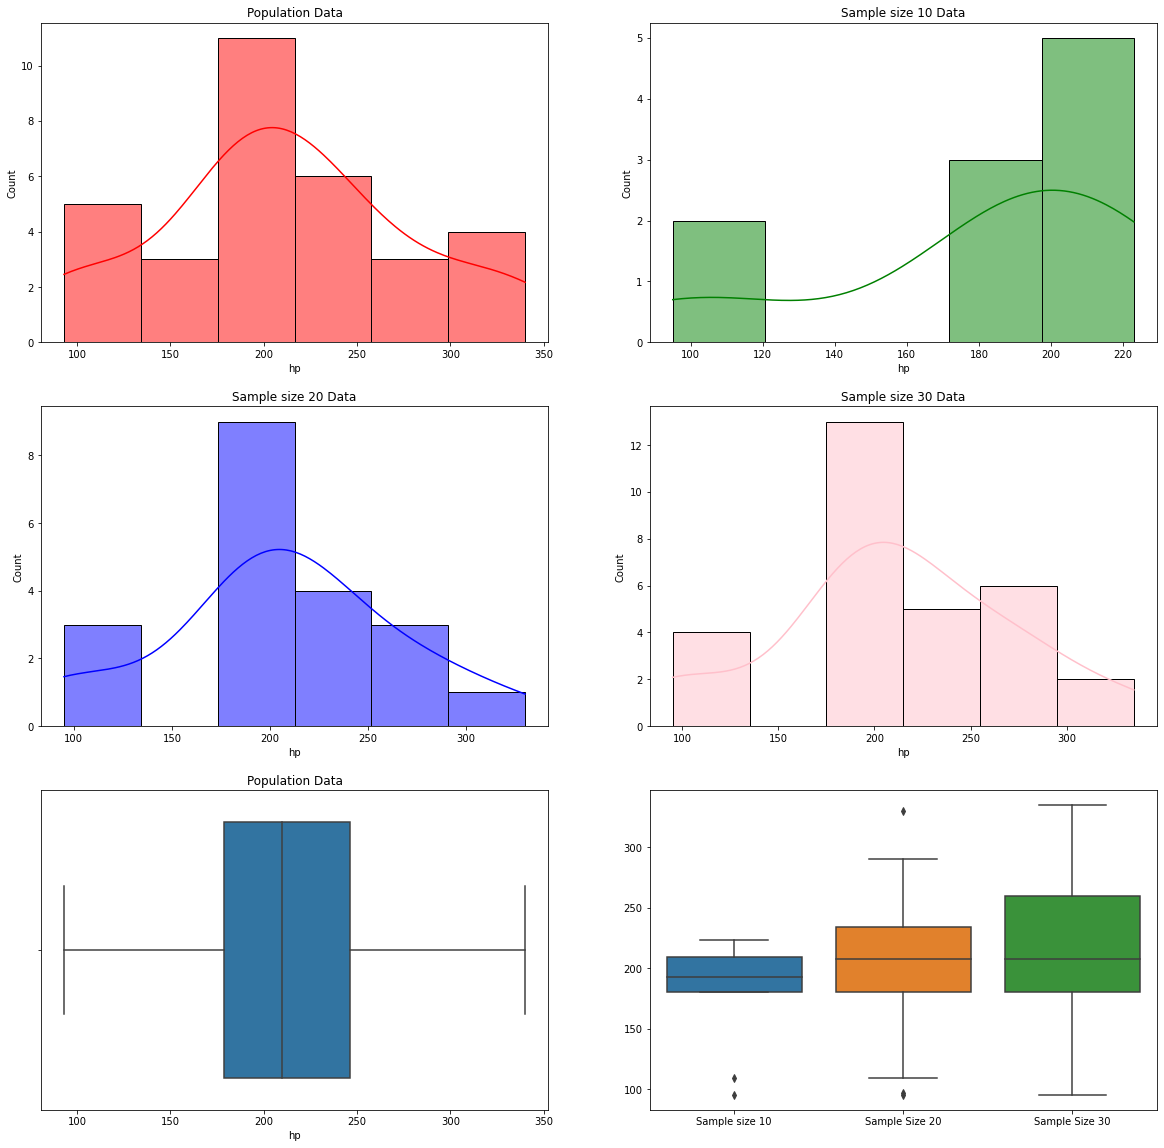

In [82]:
# t2.3 present the shape of the distribution of population and sample data

plt.figure(figsize = (20, 20))

plt.subplot(3, 2, 1)
sns.histplot(pop, kde = True, color = 'red')
plt.title('Population Data')

plt.subplot(3, 2, 2)
sns.histplot(sam10, kde = True, color = 'green')
plt.title('Sample size 10 Data')

plt.subplot(3, 2, 3)
sns.histplot(sam20, kde = True, color = 'blue')
plt.title('Sample size 20 Data')

plt.subplot(3, 2, 4)
sns.histplot(sam30, kde = True, color = 'pink')
plt.title('Sample size 30 Data')

plt.subplot(3, 2, 5)
sns.boxplot(pop)
plt.title('Population Data')

plt.subplot(3, 2, 6)
sns.boxplot(data = [sam10, sam20, sam30])
plt.xticks([0, 1, 2], ['Sample size 10', 'Sample Size 20', 'Sample Size 30']);

#### T2.4

It can be observed that as the sample size grows bigger, it starts to get closer and closer to the population data.

Larger samples more closely approximate the population



for comparison


- sample size 30 against population

    -- mean, 211.3125 for population and 211.2 for sample size 30
    
    -- median, 210 for population and 207.5 for sample size 30
    
    -- std, 68.5134493507332 for population and 62.313667067893505 for sample size 30
    
    
    
- sample size 10 against population

    -- mean, 180.2 for sample size 10 and 211.3125 for population
    
    -- median, 192.5 for sample size 10 and 210 for population
    
    -- mode, 44.08275046873651 for sample size 10 and 68.5134493507332 for population
